In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
train = pd.read_csv("/content/gdrive/MyDrive/Analytics_vidhya/train_Df64byy.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Analytics_vidhya/test_YCcRUnU.csv")
combine = [train,test]
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


# Visualization

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
train['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [5]:
train['Health Indicator'] = train['Health Indicator'].fillna('X1')
test['Health Indicator'] = test['Health Indicator'].fillna('X1')

In [6]:
train[['Health Indicator', 'Response']].groupby(['Health Indicator'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Health Indicator,Response
6,X7,0.316327
3,X4,0.243079
1,X2,0.241096
5,X6,0.239844
0,X1,0.239424
2,X3,0.236469
4,X5,0.236248
7,X8,0.230769
8,X9,0.222222


In [7]:
train['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [8]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna('1.0')
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna('1.0')

In [9]:
train[['Holding_Policy_Duration', 'Response']].groupby(['Holding_Policy_Duration'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Holding_Policy_Duration,Response
1,10.0,0.273063
4,13.0,0.270059
12,7.0,0.257143
13,8.0,0.256839
3,12.0,0.253411
2,11.0,0.250916
5,14+,0.250750
6,14.0,0.246781
9,4.0,0.240707
10,5.0,0.238357


In [10]:
train['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [11]:
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna(3.0)
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(3.0)

In [12]:
train[['Holding_Policy_Type', 'Response']].groupby(['Holding_Policy_Type'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Holding_Policy_Type,Response
3,4.0,0.248203
2,3.0,0.240262
1,2.0,0.237762
0,1.0,0.235776


In [13]:
train['Region_Code'].unique()

array([3213, 1117, 3732, ..., 5326, 6149, 5450])

In [14]:
train[['Region_Code', 'Response']].groupby(['Region_Code'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Region_Code,Response
5315,6194,1.0
4013,4562,1.0
4936,5600,1.0
4044,4595,1.0
4922,5584,1.0
...,...,...
4260,4834,0.0
4259,4833,0.0
3056,3536,0.0
4256,4830,0.0


In [15]:
train['Reco_Policy_Cat'].unique()
train[['Reco_Policy_Cat', 'Response']].groupby(['Reco_Policy_Cat'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Reco_Policy_Cat,Response
14,15,0.465635
21,22,0.328385
11,12,0.315037
16,17,0.298456
4,5,0.290963
18,19,0.276969
7,8,0.269330
19,20,0.254958
13,14,0.243972
15,16,0.223555


In [16]:
'''
for dataset in combine:    
    dataset.loc[ dataset['Policy_Sales_Channel'] <=33.4 , 'Policy_Sales_Channel'] = 0
    dataset.loc[(dataset['Policy_Sales_Channel'] > 33.4) & (dataset['Policy_Sales_Channel'] <= 65.8), 'Policy_Sales_Channel'] = 1
    dataset.loc[(dataset['Policy_Sales_Channel'] > 65.8) & (dataset['Policy_Sales_Channel'] <= 98.2), 'Policy_Sales_Channel'] = 2
    dataset.loc[(dataset['Policy_Sales_Channel'] > 98.2) & (dataset['Policy_Sales_Channel'] <= 130.6), 'Policy_Sales_Channel'] = 3
    dataset.loc[ dataset['Policy_Sales_Channel'] > 130.6, 'Policy_Sales_Channel']=4
    dataset['Policy_Sales_Channel'] = dataset['Policy_Sales_Channel'].astype(int)

#train = train.drop(['channel_band'], axis=1)
combine = [train, test]
    
train.head(10)
'''

"\nfor dataset in combine:    \n    dataset.loc[ dataset['Policy_Sales_Channel'] <=33.4 , 'Policy_Sales_Channel'] = 0\n    dataset.loc[(dataset['Policy_Sales_Channel'] > 33.4) & (dataset['Policy_Sales_Channel'] <= 65.8), 'Policy_Sales_Channel'] = 1\n    dataset.loc[(dataset['Policy_Sales_Channel'] > 65.8) & (dataset['Policy_Sales_Channel'] <= 98.2), 'Policy_Sales_Channel'] = 2\n    dataset.loc[(dataset['Policy_Sales_Channel'] > 98.2) & (dataset['Policy_Sales_Channel'] <= 130.6), 'Policy_Sales_Channel'] = 3\n    dataset.loc[ dataset['Policy_Sales_Channel'] > 130.6, 'Policy_Sales_Channel']=4\n    dataset['Policy_Sales_Channel'] = dataset['Policy_Sales_Channel'].astype(int)\n\n#train = train.drop(['channel_band'], axis=1)\ncombine = [train, test]\n    \ntrain.head(10)\n"

In [17]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [18]:
train['age_gap'] = train['Upper_Age'] - train['Lower_Age']
test['age_gap'] = test['Upper_Age'] - test['Lower_Age']

In [19]:
del train['Upper_Age']
del train['Lower_Age']
del test['Upper_Age']
del test['Lower_Age']

In [20]:
train.corr()

,ID,Region_Code,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,age_gap
ID,1.000000,-0.000465,0.004605,-0.002235,-0.002350,0.005159,-0.007126
Region_Code,-0.000465,1.000000,0.009348,-0.065120,-0.010797,0.001121,0.000711
Holding_Policy_Type,0.004605,0.009348,1.000000,0.053760,0.012266,0.006208,0.011147
Reco_Policy_Cat,-0.002235,-0.065120,0.053760,1.000000,0.060989,0.114321,0.010295
Reco_Policy_Premium,-0.002350,-0.010797,0.012266,0.060989,1.000000,0.007943,0.445343
Response,0.005159,0.001121,0.006208,0.114321,0.007943,1.000000,0.012284
age_gap,-0.007126,0.000711,0.011147,0.010295,0.445343,0.012284,1.000000


# Preprocessing

In [21]:
train["Accomodation_Type"].replace(["Rented","Owned"],[0,1],inplace = True)
train["Reco_Insurance_Type"].replace(["Individual","Joint"],[0,1],inplace = True)
train["Is_Spouse"].replace(["Yes","No"],[0,1],inplace = True)
train['Holding_Policy_Duration'].replace('14+','14',inplace= True)

In [22]:
test["Accomodation_Type"].replace(["Rented","Owned"],[0,1],inplace = True)
test["Reco_Insurance_Type"].replace(["Individual","Joint"],[0,1],inplace = True)
test["Is_Spouse"].replace(["Yes","No"],[0,1],inplace = True)
test['Holding_Policy_Duration'].replace('14+','14',inplace= True)

In [23]:
train['Holding_Policy_Duration']= train['Holding_Policy_Duration'].astype('float64')
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].astype('float64')

In [24]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['Health Indicator'] = lb.fit_transform(train['Health Indicator'])
test['Health Indicator'] = lb.transform(test['Health Indicator'])

In [25]:
cols_to_scale = ['Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium','age_gap']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

In [26]:
print(len(train[train['Response'] == 1]))
print(len(train[train['Response'] == 0]))

12209
38673


In [27]:
positives = train[train['Response'] == 1].index  
negatives = train[train['Response'] == 0].index

In [28]:
import numpy as np
np.random.seed(42)
negIndexes = np.random.choice(negatives, len(positives)*2, replace = False)
trainDf = train.iloc[list(positives)+list(negIndexes)]

In [29]:
from sklearn.utils import shuffle
df = shuffle(trainDf)
df.head(2)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,age_gap
39716,39717,C2,133,0,0,1,0,-0.707211,0.400939,0.297261,-1.380263,1,-0.30842
13778,13779,C4,1417,1,0,1,0,-0.707211,0.400939,0.454975,-0.888307,0,-0.30842


# Deep learning


In [ ]:
import keras.backend as K
import tensorflow as tf

In [ ]:
def focal_loss(gamma=2., alpha=.25):
	def focal_loss_fixed(y_true, y_pred):
		pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
		pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
		return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
	return focal_loss_fixed


In [ ]:
# importing libraries and keras packages
from keras.models import Sequential
from keras.layers import Dense , Dropout,BatchNormalization
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
'''
negIndexes = np.random.choice(negatives, len(positives)*3, replace = False)
trainDf = train.iloc[list(positives)+list(negIndexes)]
df = shuffle(trainDf)

X = df.drop(['id','Response'], axis=1)
y = df['Response'].values
test_data = test.drop(['id'], axis=1)
'''
# Initializing the ann
classifier = Sequential()

# adding layers to classifier
classifier.add(Dense(units = 16 , activation = 'relu',kernel_initializer='he_uniform' , input_dim = X.shape[1]))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 32 , activation= 'relu',kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 32 , activation= 'relu',kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 1 , activation='sigmoid'))

# compiling ann
opt = SGD(lr=0.001, momentum=0.9) 
classifier.compile(optimizer= 'sgd' , loss = focal_loss(gamma=2.0, alpha=0.25) ,metrics = ['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Fitting the dataset to ann classifier
classifier.fit(X_train , y_train,validation_data=(X_test,y_test), batch_size =32 ,epochs = 20)


In [ ]:
print(classification_report(y_test,classifier.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     73815
           1       0.00      0.00      0.00     12360

    accuracy                           0.86     86175
   macro avg       0.43      0.50      0.46     86175
weighted avg       0.73      0.86      0.79     86175



# Classifiers

In [64]:
X = train.drop(['ID','Response','City_Code','Region_Code'], axis=1)
y = train['Response'].values
test_data = test.drop(['ID','City_Code','Region_Code'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression()

logreg.fit(X_train,y_train)
print(logreg.score(X_test,y_test))
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
print(classification_report(y_test,logreg.predict(X_test)))
print(roc_auc_score(y_test,logreg.predict(X_test)))

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,Holding_Policy_Duration,0.286522
1,Region_Code,0.089968
2,Accomodation_Type,0.072828
4,Is_Spouse,0.048669
8,Reco_Policy_Cat,0.024706
3,Reco_Insurance_Type,-0.000538
0,City_Code,-0.004377
7,Holding_Policy_Type,-0.027064
5,Health Indicator,-0.028018
9,Reco_Policy_Premium,NaN


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
svm = DecisionTreeClassifier()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.6426255281517147

# XGB + Oversampling + local Outliars

In [100]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
X = train.drop(['ID','Response','City_Code','Region_Code'], axis=1)
y = train['Response']
test_data = test.drop(['ID','City_Code','Region_Code'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify = y)

yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
#X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]



In [77]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [132]:
train.head(2)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,age_gap
0,1,C3,3213,0,0,1,0,2.337901,0.400939,1.08583,-0.387852,0,-0.30842
1,2,C5,1117,1,1,1,1,-0.707211,0.400939,1.08583,2.477394,0,7.41152


In [137]:
import xgboost as xgb
# read in data
X_new = train.drop(['ID','Response','City_Code','Region_Code','Reco_Insurance_Type','Is_Spouse'], axis=1)
y_new = train['Response'].values
test_data = test.drop(['ID','City_Code','Region_Code','Reco_Insurance_Type','Is_Spouse'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1,stratify = y_new)


dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test,y_test)
evallist = [(dtest, 'eval'), (dtrain, 'train')]
# specify parameters via map
param = {'booster': 'gbtree',
         'n_estimators':200,
         'max_depth': 10, 'learning_rate': 0.01,
         'objective': 'binary:logistic',
         'colsample_bytree':0.8,
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'subsample':0.5,
         'scale_pos_weight':38673/12209,
         'eval_metric':'auc',
         "silent": 1,
         "early.stop.round": 5,
         'skip_drop': 0.5}

clf = xgb.XGBClassifier(**param)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        verbose=True)

evals_result = clf.evals_result()


num_round = 10
#bst = xgb.train(param, dtrain, num_round,evallist)
#preds = bst.predict(dtest)

[0]	validation_0-auc:0.663489	validation_1-auc:0.615427
[1]	validation_0-auc:0.677371	validation_1-auc:0.624695
[2]	validation_0-auc:0.683383	validation_1-auc:0.631096
[3]	validation_0-auc:0.686203	validation_1-auc:0.633546
[4]	validation_0-auc:0.689435	validation_1-auc:0.634602
[5]	validation_0-auc:0.693866	validation_1-auc:0.635299
[6]	validation_0-auc:0.697432	validation_1-auc:0.637488
[7]	validation_0-auc:0.697055	validation_1-auc:0.638841
[8]	validation_0-auc:0.697489	validation_1-auc:0.639172
[9]	validation_0-auc:0.700396	validation_1-auc:0.638572
[10]	validation_0-auc:0.702881	validation_1-auc:0.638384
[11]	validation_0-auc:0.705656	validation_1-auc:0.638116
[12]	validation_0-auc:0.707883	validation_1-auc:0.638163
[13]	validation_0-auc:0.707193	validation_1-auc:0.639256
[14]	validation_0-auc:0.709289	validation_1-auc:0.639142
[15]	validation_0-auc:0.711433	validation_1-auc:0.638766
[16]	validation_0-auc:0.713634	validation_1-auc:0.637711
[17]	validation_0-auc:0.714603	validation

In [118]:
param_test = {'booster': ['dart'],
         'max_depth': [4,5,6,7,8], 'learning_rate': [0.01],
         'objective': ['binary:logistic'],
         'subsample':[i/10.0 for i in range(5,10)],
         'colsample_bytree':[i/10.0 for i in range(5,10)],
         'min_child_weight':[2,3,4,5,6,8],
         'reg_alpha':[1e-2, 0.1],
         'sample_type': ['uniform'],
         'normalize_type': ['tree'],
         'rate_drop': [0.1],
         'scale_pos_weight':[38673/12209],
         'eval_metric':['auc'],
         "silent": [1],
         "early.stop.round":[5],
         'skip_drop': [0.5]}


In [119]:
from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(estimator= xgb.XGBClassifier(n_estimators=20), 
                          param_grid= param_test,
                          cv=2, 
                          n_jobs=-1, 
                          scoring='roc_auc', 
                          verbose=2)

gsearch.fit(X_train,y_train)

print('Best Grid Search Parameters :',gsearch.best_params_)
print('Best Grid Search Score : ',gsearch.best_score_)

Fitting 2 folds for each of 1500 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 19.8min finished


Best Grid Search Parameters : {'booster': 'dart', 'colsample_bytree': 0.9, 'early.stop.round': 5, 'eval_metric': 'auc', 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 8, 'normalize_type': 'tree', 'objective': 'binary:logistic', 'rate_drop': 0.1, 'reg_alpha': 0.01, 'sample_type': 'uniform', 'scale_pos_weight': 3.1675812924891473, 'silent': 1, 'skip_drop': 0.5, 'subsample': 0.6}
Best Grid Search Score :  0.6357043959007125


In [130]:

best_params = {'booster': 'dart',
                'n_estimator':500,
                         'colsample_bytree': 0.9, 
                         'early.stop.round': 5,
                         'eval_metric': 'auc',
                         'learning_rate': 0.01,
                         'max_depth': 8,
                         'min_child_weight': 8,
                         'normalize_type': 'tree', 
                         'objective': 'binary:logistic',
                         'rate_drop': 0.1,
                         'reg_alpha': 0.01,
                         'sample_type': 'uniform',
                         'scale_pos_weight': 1,
                         'silent': 1,
                         'skip_drop': 0.5,
                         'subsample': 0.5}
clf = xgb.XGBClassifier(**best_params)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc',
        verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-auc:0.569686	validation_1-auc:0.57392
[1]	validation_0-auc:0.569686	validation_1-auc:0.581901
[2]	validation_0-auc:0.607484	validation_1-auc:0.599374
[3]	validation_0-auc:0.605229	validation_1-auc:0.603708
[4]	validation_0-auc:0.615471	validation_1-auc:0.614703
[5]	validation_0-auc:0.627322	validation_1-auc:0.617331
[6]	validation_0-auc:0.629931	validation_1-auc:0.62022
[7]	validation_0-auc:0.630488	validation_1-auc:0.616996
[8]	validation_0-auc:0.631045	validation_1-auc:0.618108
[9]	validation_0-auc:0.625712	validation_1-auc:0.616168
[10]	validation_0-auc:0.630406	validation_1-auc:0.616064
[11]	validation_0-auc:0.633562	validation_1-auc:0.617301
[12]	validation_0-auc:0.634277	validation_1-auc:0.617771
[13]	validation_0-auc:0.635432	validation_1-auc:0.617109
[14]	validation_0-auc:0.636255	validation_1-auc:0.617774
[15]	validation_0-auc:0.637566	validation_1-auc:0.6193
[16]	validation_0-auc:0.635615	validation_1-auc:0.619117
[17]	validation_0-auc:0.639437	validation_1-a

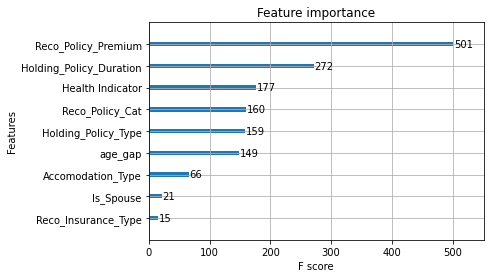

In [123]:
xgb.plot_importance(bst)

# prediction for test set


In [124]:
y_pred =  clf.predict_proba(test_data)
y_pred =  y_pred[:,1]
y_pred

array([0.556368  , 0.50158215, 0.5204244 , ..., 0.3002732 , 0.52490205,
       0.4242461 ], dtype=float32)

In [125]:
sol = pd.DataFrame()
sol['ID'] = test['ID']
sol['Response'] = y_pred

In [54]:
sol.head()

,ID,Response
0,50883,0.506868
1,50884,0.507267
2,50885,0.507267
3,50886,0.507267
4,50887,0.506868


In [126]:
sol.to_csv('sol.csv',index=False)

# Other Methods

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scoring for different class weights')

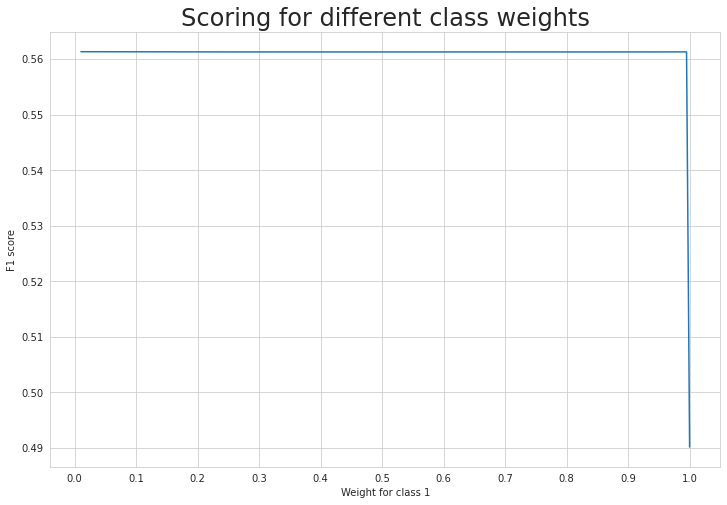

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='roc_auc', 
                          verbose=2).fit(X_train, y_train)
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
gridsearch.best_params_

{'class_weight': {0: 0.9800502512562814, 1: 0.019949748743718576}}

In [89]:
#lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.9800502512562814, 1: 0.019949748743718576})
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
lr=RandomForestClassifier(n_estimators=100,class_weight={0:3,1:1})

lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))
print(classification_report(y_test,lr.predict(X_test)))

0.7028593888179228
0.5227657610010551
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      7735
           1       0.30      0.18      0.22      2442

    accuracy                           0.70     10177
   macro avg       0.53      0.52      0.52     10177
weighted avg       0.66      0.70      0.67     10177



In [ ]:
pred = lr.predict_proba(test_data)
pred

array([[0.17, 0.83],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       ...,
       [0.98, 0.02],
       [0.43, 0.57],
       [0.97, 0.03]])

In [ ]:
y_pred = lr.predict(test_data.values)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
rfc =RandomForestClassifier(n_estimators=100)
from sklearn.model_selection import GridSearchCV,StratifiedKFold
param_grid = { 
    'n_estimators': [200, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='roc_auc', 
                          verbose=2).fit(X_train, y_train)
CV_rfc.best_params_

In [ ]:
#Random Forest


# FastAi

In [ ]:
from fastai import *

train_fastai = pd.read_csv("/content/gdrive/MyDrive/Analytics_vidhya/train_Df64byy.csv")
test_fastai = pd.read_csv("/content/gdrive/MyDrive/Analytics_vidhya/test_YCcRUnU.csv")
test_fastai.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [ ]:
from fastai.tabular import *
dep_var = 'Response'
cat_names = train_fastai.select_dtypes(exclude=['int', 'float']).columns
#cat_names = [ 'Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage','Vehicle_Age','id']

cont_names = train_fastai.select_dtypes([np.number]).columns
#cont_names = [ 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Vintage']

# Transformations
procs = [FillMissing, Categorify, Normalize]

# Test Tabular List
test_fastai = TabularList.from_df(test_fastai, cat_names=cat_names, cont_names=cont_names, procs=procs)

# Train Data Bunch
data = (TabularList.from_df(train_fastai, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_idx(list(range(0,200)))
                        .label_from_df(cols = dep_var)
                        .add_test(test, label=0)
                        .databunch())

data.show_batch(rows=10)

In [ ]:
# Create deep learning model
learn = tabular_learner(data, layers=[20, 10, 5], metrics=accuracy, emb_drop=0.1, callback_fns=ShowGraph)

# select the appropriate learning rate
learn.lr_find()

# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(1, max_lr=slice(1e-03))

# Analyse our model
learn.model
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
